<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfPBCGLDxsK-f0Wnhf9jOj4HnYDCAA8QFvPw&s" width="200">

# 01MIAR - Actividad Dataset

Esta actividad tiene el objetivo de aplicar los conocimientos adquiridos en el curso sobre tratamiento, análisis y visualización de datos con Python.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas
import requests
import zipfile
import io
import textdistance

# 1. Conjunto de datos

El dataset elegido para esta actividad contiene datos sobre más de 300.000 accidentes de tráfico en Reino Unido entre los años 2021 y 2022. Este conjunto de datos contiene información muy valiosa sobre la seguridad vial, pero a partir de ellos no vamos a poder extraer algunas conclusiones que serían muy valiosas como, por ejemplo, los factores de riesgo que pueden provocar un accidente. Entre estos factores podríamos intentar valorar las condiciones climáticas, la ubicación geográfica o el tipo de vehículo. Sin embargo, este dataset solo contiene observaciones de accidentes, por lo que no disponemos de un contrafactual para comparar con situaciones que no hayan llevado a un accidente. Para estimar los factores de riesgo en el caso de las condiciones climáticas, por ejemplo, necesitaríamos conocer todos los desplazamientos realizados en Reino Unido entre esos años, y las condiciones climáticas en cada uno, lo que nos proporcionaría una estimación válida de si una condición climática concreta provoca realmente accidentes o no. 

Este cuaderno está organizado de la siguiente manera: la Sección 1 proporciona una introducción al trabajo, explicando los análisis que se harán, además de presentar, leer y describir el contenido del conjunto de datos. La Sección 2 está dedicada a la limpieza y preprocesamiento del dataset, que pretende facilitar las tareas posteriores de análisis, con transformaciones de variables existentes o creación de nuevas, y tratando datos erróneos y faltantes. La Sección 3 presenta un análisis descriptivo y exploratorio del conjunto de datos, visualizando las variables más importantes y sus relaciones, y entrando en detalles como un análisis geográfico, que permitirá comparar el riesgo de accidentes entre distritos. Por último, la Sección 4 resume las conclusiones de esta actividad.


## 1.1. Fuente

El conjunto de datos elegido para esta actividad proviene de kaggle. El enlace para este dataset es el siguiente: [enlace al dataset road-accidents-dataset en kaggle](https://www.kaggle.com/datasets/atharvasoundankar/road-accidents-dataset). 


## 1.2. Objetivos

Como ya hemos expuesto en la introducción, debido a la naturaleza del conjunto de datos no es posible realizar algunos de los análisis que nos gustaría. Sin embargo, si que podemos realizar otros análisis muy interesantes, como los que describimos a continuación:


1. Análisis descriptivos sobre accidentes (Sección 3)
    - Tendencia en el tiempo
    - Condiciones climáticas más comunes cuando se producen accidentes
    - Lugares más comunes donde se producen accidentes

2. Exploración de algunos factores de riesgo de accidentes graves en comparación con accidentes leves (Subsección 3.2)

3. Comparación del riesgo de accidentes entre regiones (Subsección 3.4)



En este cuaderno realizaremos estos análisis, explicando en cada caso los resultados obtenidos y la metodología empleada.


## 1.3. Lectura del conjunto de datos

Solicitamos los datos con una petición a la API de Kaggle, descomprimimos el fichero recibido, y lo leemos con pandas. 

In [2]:
# Lectura del dataset

# Petición a kaggle del dataset comprimido
url = "https://www.kaggle.com/api/v1/datasets/download/atharvasoundankar/road-accidents-dataset"
response = requests.get(url)


# Descomprimir y leer con pandas
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("Road Accident Data.csv") as accidents_file:
        accidents = pd.read_csv(accidents_file)

In [3]:
# Mostrar contenido y variables
print(accidents.shape)
print(accidents.columns)
display(accidents.sample(5))

(307973, 21)
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
185258,BS0185259,09-06-2022,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.644455,Daylight,Enfield,NaN,...,1,1,Metropolitan Police,Dry,Single carriageway,30,10:00,Urban,Fine no high winds,Car
256218,BS0256219,25-05-2022,Tuesday,Give way or uncontrolled,Private drive or entrance,Serious,52.059580,Daylight,Ipswich,NaN,...,1,2,Suffolk,Dry,Single carriageway,40,17:30,Urban,Fine no high winds,Car
234511,BS0234512,02-05-2022,Sunday,Give way or uncontrolled,T or staggered junction,Slight,52.240569,Daylight,Wychavon,NaN,...,2,2,West Mercia,Wet or damp,Single carriageway,60,13:00,Rural,Fine no high winds,Car
63763,BS0063764,19-05-2021,Tuesday,Auto traffic signal,T or staggered junction,Slight,54.560838,Darkness - lights lit,Stockton-on-Tees,NaN,...,1,1,Cleveland,Dry,Single carriageway,30,00:50,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
47093,BS0047094,11-02-2021,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.861165,Daylight,Derwentside,NaN,...,1,1,Durham,Snow,Single carriageway,30,16:12,Urban,Fine no high winds,Motorcycle over 500cc


## 1.3 Contenido del conjunto de datos

Como hemos podido ver en las salidas del código anteriores, este conjunto de datos tiene 21 columnas y 307.973 filas. En esta subsección vamos a describir el contenido del dataset, observando las propiedades de cada variable. Para ello, las vamos dividir en dos grupos según sean categóricas o numéricas. La mayoría de ellas son categóricas, como se puede ver a continuación:

In [4]:
# Tipos de las variables y su contenido (rango, tipos de valores, NAs)

accidents.info()

# Código personalizado

print(f"\n{'Variable':<27} -> {'dtype':<10} (Comentario)")
for var in accidents.columns:
    dtype = str(accidents[var].dtype)
    
    # Comentario por tipo de variable categóricas / numéricas
    if dtype == "object":
        unique_values = accidents[var].dropna().unique()
        comment_on_variable = f"{unique_values.shape[0]:_} valores posibles: {', '.join(unique_values[:2])}, ..."
    else:
        comment_on_variable = f"Rango: [{accidents[var].min()}, {accidents[var].max()}]"

    is_na = accidents[var].isna()
    if any(is_na):        
        comment_on_variable = f"Contiene {is_na.sum():_} NA; " + comment_on_variable

    print(f"{var:<27} -> {dtype:<10} ({comment_on_variable})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

#### Variables categóricas

1. ``Accident_Index``: Código identificativo con 2 letras y 7 números
2. ``Accident Date``: Fecha del accidente en formato día-mes-año.
3. ``Day_of_Week``: Día de la semana del accidente.
4. ``Junction_Control``: Tipo de regulación de la intersección del accidente (si aplica).
5. ``Junction_Detail``: Detalles sobre la intersección del accidente (si aplica).
6. ``Accident_Severity``: Tipo de gravedad del accidente
7. ``Light_Conditions``: Condiciones de luminosidad del accidente.
8. ``Local_Authority_(District)``: Distrito competente en el lugar del accidente.
9. ``Carriageway_Hazards``: Peligros en el lugar del accidente (animales, peatones, otro accidente, etc).
10. ``Police_Force``: Tipo de policía que acude al lugar del accidente.
11. ``Road_Surface_Conditions``: Condiciones de la carretera en el lugar del accidente.
12. ``Road_Type``: Tipo de carretera del lugar del accidente.
13. ``Time``: Hora del accidente.
14. ``Urban_or_Rural_Area``: Zona urbana o rural. 
15. ``Weather_Conditions``: Condiciones climáticas en el lugar del accidente (lluvia, viento, niebla, etc).
16. ``Vehicle_Type``: Tipo de vehículo que provoca el accidente.

<br>

Las variables de fecha y hora tienen que ser transformadas a una variable de tipo timestamp para manejarse mejor. Como la variable con la hora (``Time``) tiene datos faltantes, los rellenaremos por defecto con la hora '00:00', ya que no hay ninguna otra observación con esta hora y podrán seguir siendo identificables en caso de causar problemas.

La otra variable que también tiene NAs es ``Carriageway_Hazards``, para la cual el 98% de los datos son faltantes. Para no asumir ninguna cualidad sobre esta variable, los reemplazaremos por el valor por defecto 'unknown'.

Llama la atención que la variable ``Junction_Control`` tiene como uno de sus valores 'Auto traffic sigl', lo que parece un error. En la siguiente sección lo exploraremos más en detalle, y analizaremos si debe ser corregido.

In [5]:
# Estadísticos descriptivos básicos de las variables categóricas (recuento, valores únicos, moda)
display(accidents.describe(include = [ "O" ]))

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,307973,307973,307973,307973,307973,307973,307973,307973,5424,307973,307973,307973,307956,307973,307973,307973
unique,307973,730,7,7,9,4,5,422,5,51,5,5,1439,2,8,15
top,BS0307973,13-11-2021,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Slight,Daylight,Birmingham,Other object on road,Metropolitan Police,Dry,Single carriageway,17:00,Urban,Fine no high winds,Car
freq,1,692,50529,150045,123094,263280,227286,6165,2243,46789,208967,230612,2933,198532,244496,239794


#### Variables numéricas

1. ``Latitude``: Latitud de la ubicación geográfica del accidente.
2. ``Longitude``: Longitud de la ubicación geográfica del accidente.
3. ``Number_of_Casualties``: Número de víctimas involucradas en el accidente.
4. ``Number_of_Vehicles``: Número de vehículos involucrados en el accidente.
5. `Speed_limit`: Límite de velocidad en el lugar del accidente en millas por hora.

Ninguna de estas variables tiene datos faltantes.

In [6]:
# Estadísticos descriptivos básicos de las variables numéricas (media, desviación típica, cuartiles y rango)
display(accidents.describe())

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


# 2. Limpieza y preprocesamiento

Esta sección de preprocesamiento y limpieza tiene como objetivo facilitar los análisis posteriores, para lo cual deberemos comprobar que la calidad de los datos es adecuada, que no hay datos incorrectos, que no haya valores faltantes, y crear nuevas variables que pudieran ser necesarias para los análisis.


## 2.1. Eliminación de valores faltantes

Como ya vimos en la sección anterior, hay dos variables con valores faltantes, que son `Time` y `Carriageway_Hazards`, por lo que los sustituimos por nuevos valores por defecto.

In [7]:
# Eliminar NAs de variable de hora
accidents["Time"] = accidents["Time"].fillna("00:00")

# Eliminar NAs de variable Carriageway_Hazards
accidents["Carriageway_Hazards"] = accidents["Carriageway_Hazards"].fillna("unknown")

## 2.2. Corrección de errores en variables categóricas

Ya hemos podido ver en la sección anterior que algunas de las cadenas de texto contienen erratas, por lo que nos hace sospechar que pueda haber más. En esta subsección vamos a analizar las variables categóricas, mientras que analizaremos las variables numéricas en la siguiente. 

Para verificar los errores vamos a analizar los valores únicos de estas variables. Empezaremos contando el número de valores únicos de cada variable.

In [ ]:
# Exploramos los valores 

categorical_variables_unique_values: dict[str, np.int64] = {
    var: accidents[var].dropna().unique().shape[0]
    for var in accidents.columns 
    if accidents[var].dtype == "object" 
}

print(f"{'Variable':<27} -- {'Valores únicos':<14}")
for var, count in categorical_variables_unique_values.items():
    print(f"{var:<27} -- {count:^14_}")

Variable                    -- Valores únicos
Accident_Index              --    307_973    
Accident Date               --      730      
Day_of_Week                 --       7       
Junction_Control            --       7       
Junction_Detail             --       9       
Accident_Severity           --       4       
Light_Conditions            --       5       
Local_Authority_(District)  --      422      
Carriageway_Hazards         --       6       
Police_Force                --       51      
Road_Surface_Conditions     --       5       
Road_Type                   --       5       
Time                        --     1_440     
Urban_or_Rural_Area         --       2       
Weather_Conditions          --       8       
Vehicle_Type                --       15      


La mayoría tienen un conjunto pequeño de valores únicos, a excepción de el índice, las variables de tiempo y las relacionadas con los municipios. Estas las deberemos tratar de forma diferente, pero al resto las representaremos la frecuencia de cada valor mediante diagramas de barras. Así podremos ver todos sus valores, y podremos detectar posibles errores.

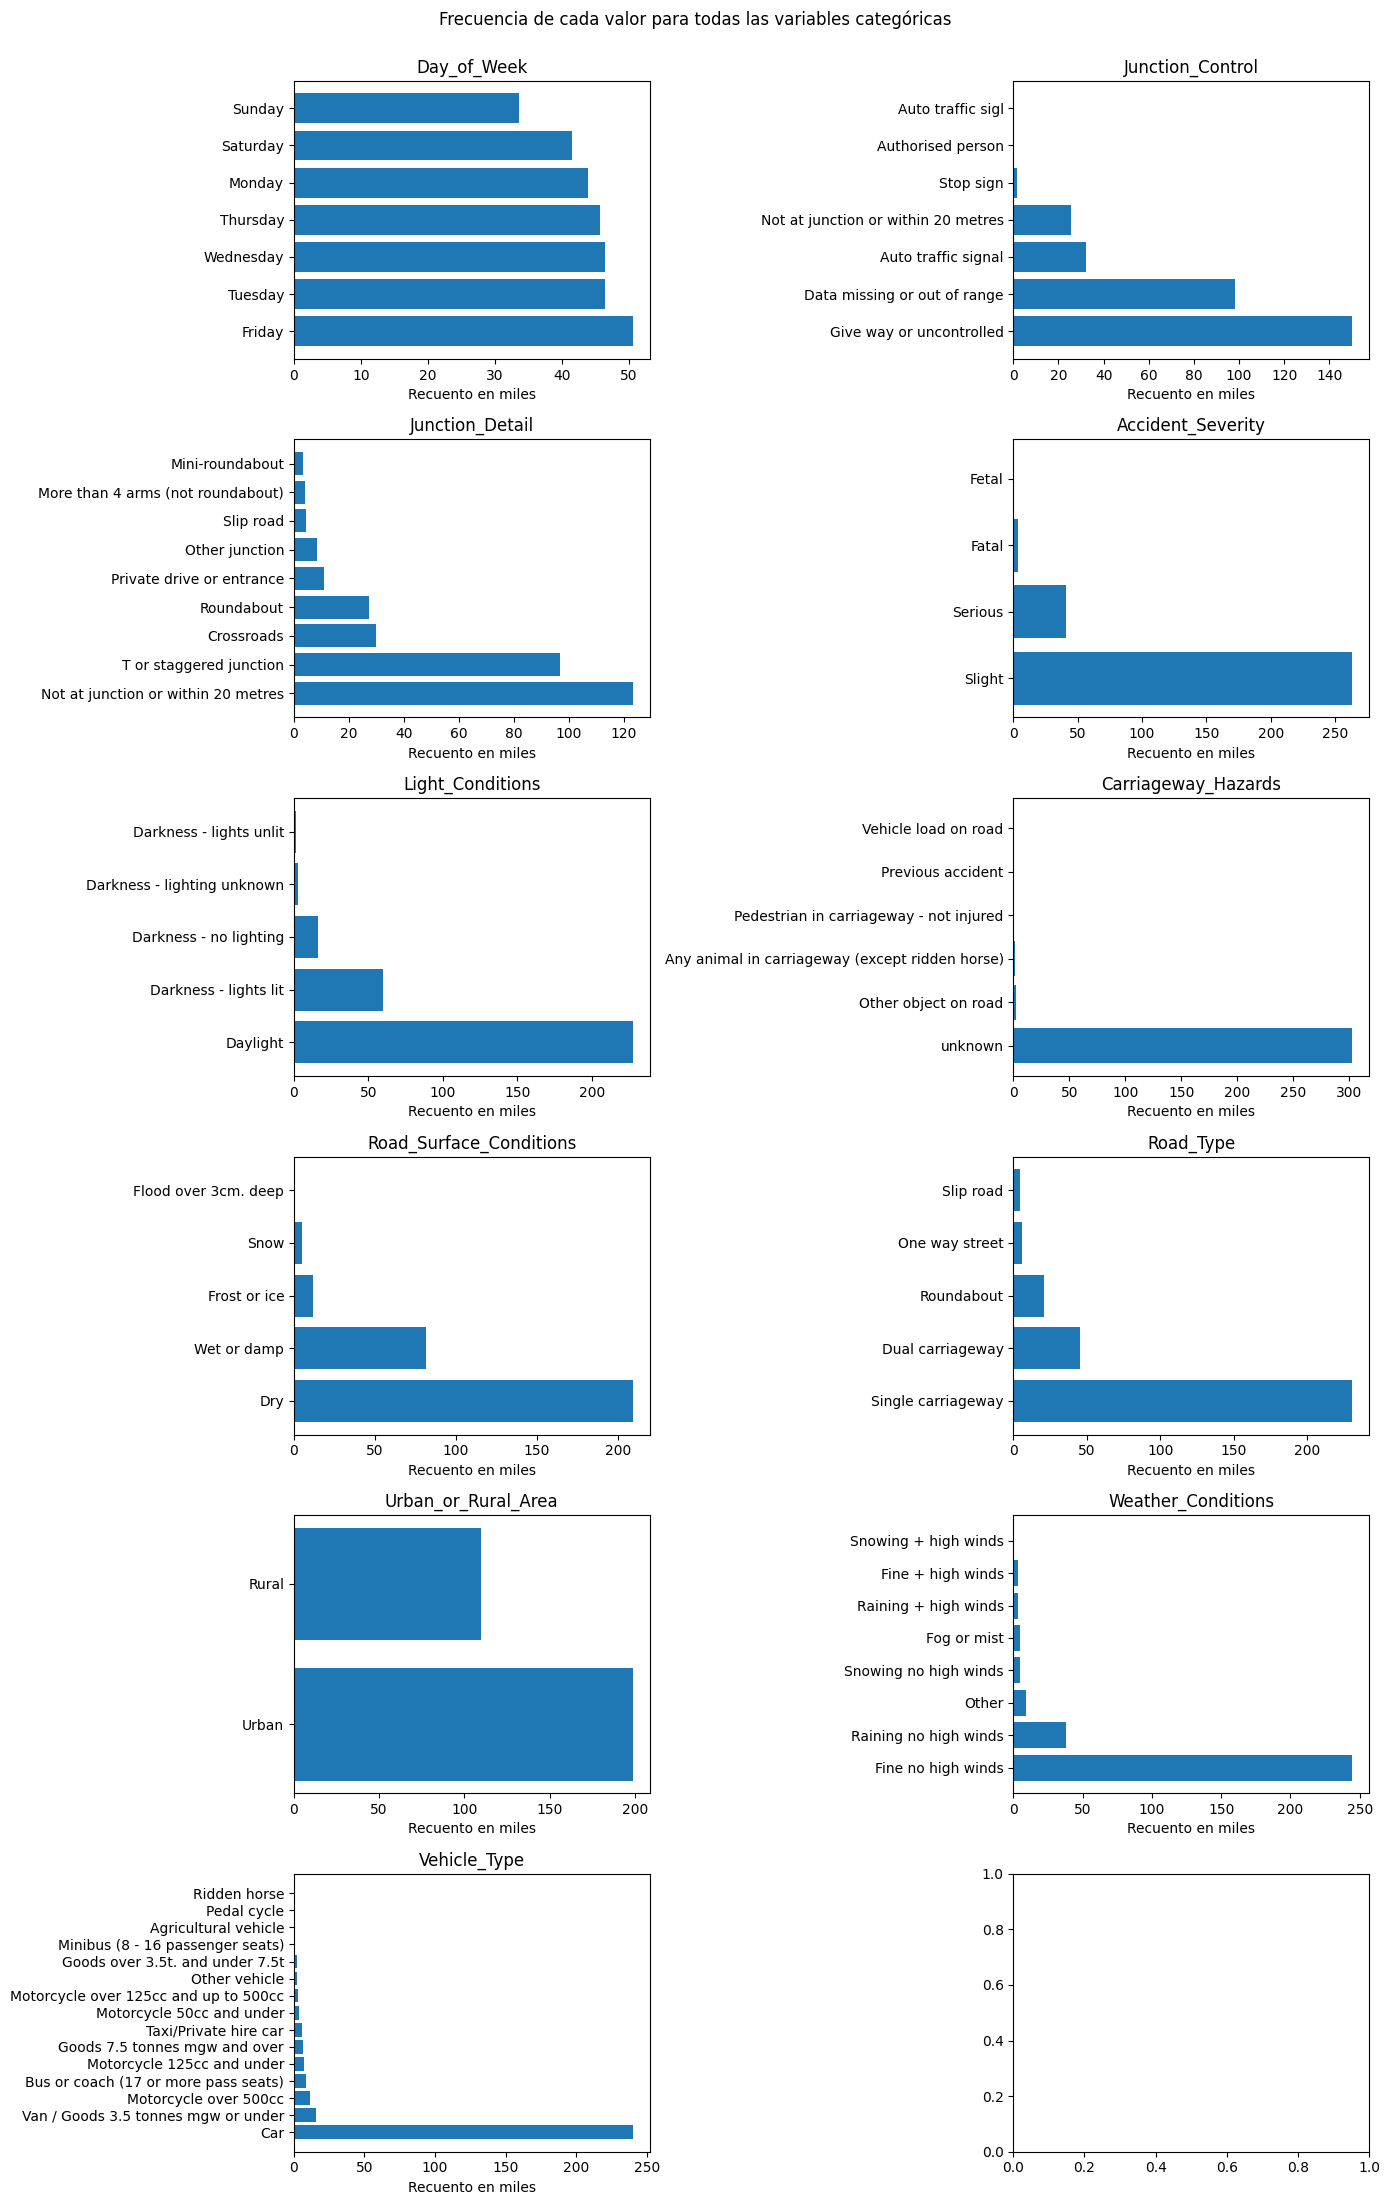

In [9]:
# Representamos en diagramas de barras los que tienen menos de 15 valores únicos

# Para cambiar el formato del eje
from matplotlib.ticker import FuncFormatter 

# Filtramos el diccionario
categorical_variables_unique_values_low_count = { 
    var: count 
    for var, count in categorical_variables_unique_values.items() 
    if count <= 15 
}

# Representación con plt.subplots
n = len(categorical_variables_unique_values_low_count)
fig, axes = plt.subplots(nrows = (n + 1) // 2, ncols = 2, figsize = (14, 2 * n))

for i, var in enumerate(categorical_variables_unique_values_low_count.keys()):
    ax = axes[i // 2, i % 2]
    counts = accidents[var].value_counts()
    ax.barh(counts.index.astype(str), counts.values)
    ax.set_title(var)
    ax.set_xlabel("Recuento en miles")

    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))


plt.suptitle("Frecuencia de cada valor para todas las variables categóricas", y = 1)
plt.tight_layout()
plt.show()

A partir de estos gráficos, hemos identificado las siguientes dos erratas:

- En la variable ``Junction_Control``: 'Auto traffic sigl' en vez de 'Auto traffic signal'
- En la variable ``Accident_Severity``: 'Fetal' en vez de 'Fatal'

Procedemos a corregirlos:

In [10]:
# Reemplazar los valores incorrectos
accidents["Junction_Control"] = accidents["Junction_Control"].replace({ "Auto traffic sigl": "Auto traffic signal" })
accidents["Accident_Severity"] = accidents["Accident_Severity"].replace({ "Fetal": "Fatal" })

Ahora seguimos explorando el resto de variables categóricas, que son las siguientes:

In [11]:
# Filtramos el diccionario
categorical_variables_high_count = [ 
    var
    for var, count in categorical_variables_unique_values.items() 
    if count > 15 
]
print(categorical_variables_high_count)

['Accident_Index', 'Accident Date', 'Local_Authority_(District)', 'Police_Force', 'Time']


Podemos verficar si hay errores en las variables de índice, fecha y hora comprobando si se ajustan respectivamente a los siguientes expresiones regulares: 

1. ^[A-Z][A-Z][0-9]{7}\$
2. ^[0-3][0-9]-[0-1][0-9]-[0-9]{4}\$
3. ^[0-2][0-9]:[0-5][0-9]^\$

Esto verifica únicamente la sintaxis, por lo que solo es una comprobación superficial. En el caso de la fecha y hora, podremos verificar que su semántica es correcta cuando las convirtamos en una variable de marca de tiempo, en la Subsección 2.4.

In [12]:
# Índice
assert(all(accidents["Accident_Index"].str.match(r"^[A-Z]{2}\d{7}$")))

# Fecha
assert(all(accidents["Accident Date"].str.match(r"^[0-3][0-9]-[0-1][0-9]-\d{4}$")))

# Hora
assert(all(accidents["Time"].str.match(r"^[0-2][0-9]:[0-5][0-9]$")))

Todos los valores son correctos, por lo que seguimos con las variables restantes. 

Para intentar encontrar posibles errores en las variables relacionadas con los municipios, a saber, ``Local_Authority_(District)`` y ``Police_Force``, vamos a intentar fijarnos en los valores menos frecuentes. Para ellos, vamos a calcular la distancia de edición (Damerau-Levenshtein) con todo el resto de posibles valores para identificar si se corresponde a alguna posible errata, mostraremos solo por pantalla aquellos que tengan alguna otra cadena de texto bastante cercana.

In [ ]:
def edit_distance(string: str, compare_to: set[str]) -> pd.Series:
    """ 
    Calcula la distancia de edición de una cadena de texto con todas las del 
    conjunto `compare_to``. Devuelve una pd.Series donde el índice es la cadena
    con la que se ha comparado, y el valor la distancia Damerau-Levenshtein.
    """
    compare_to = list(compare_to)
    return pd.Series(
        np.vectorize(lambda s: textdistance.damerau_levenshtein.distance(string, s))(compare_to),
        index = compare_to
    )

def identify_similar_strings(
        variable: pd.Series, 
        number_of_least_frequent_to_analyse: int = 50,
        min_distance_cutoff: int = 3
    ) -> None:
    """
    Compara los `number_of_least_frequent_to_analyse` elementos menos frecuentes de 
    la pd.Series `variable`, con el resto de cadenas de texto. Esto permite comprobar
    si ha habido alguna errata en los datos. Imprime la cadena más cercana por pantalla,
    en caso de que su distancia sea menor o igual que `min_distance_cutoff`.
    """
    value_counts = variable.value_counts()
    unique_set = set(value_counts.index)

    print(f"{'Valor':<25} -- {'Recuento':^10} -- {'Valor más cercano':^25} -- {'Distancia':^10}")

    # Iteramos sobre las cadenas de texto menos frecuentes, en orden creciente
    for value, value_count in value_counts[-number_of_least_frequent_to_analyse:][::-1].items():
        distances = edit_distance(value, unique_set.difference({ value }))
        min_distance = distances.min()
        if min_distance > min_distance_cutoff:
            continue
        print(f"{value:<25} -- {value_count:^10_} -- {distances.idxmin():^25} -- {min_distance:^10}")
    


print("Distritos"); identify_similar_strings(accidents["Local_Authority_(District)"])
print("\nPolicías"); identify_similar_strings(accidents["Police_Force"])

Distritos
Valor                     --  Recuento  --     Valor más cercano     -- Distancia 
Teesdale                  --     15     --         Tynedale          --     3     
South Shropshire          --     18     --     North Shropshire      --     2     
Alnwick                   --     20     --          Warwick          --     3     
Clackmannanshire          --     25     --      Clackmannshire       --     2     
North Shropshire          --     32     --     South Shropshire      --     2     
Tynedale                  --     35     --          Ryedale          --     2     
Wear Valley               --     36     --        Test Valley        --     3     
Kennet                    --     39     --          Thanet           --     3     
Caradon                   --     44     --          Craven           --     3     
Crewe and Nantwich        --     49     --     Crewe and ntwich      --     2     
Clackmannshire            --     52     --     Clackmannanshire      --     2

Para la variable de los distritos, hemos encontrado los siguientes errores buscando en google los más sospechosos, y comprobando que efectivamente son errores:

| Correcto             | Incorrecto           |
|----------------------|----------------------|
| Clackmannanshire     | Clackmannshire       |
| Crewe and Nantwich   | Crewe and ntwich     |
| Blaenau Gwent        | Blaeu Gwent          |
| Stevenage            | Stevege              |

Como esta ha sido una búsqueda no exhaustiva, y hemos encontrado bastantes errores que además se repiten con bastante frecuencia, es probable que pudiéramos encontrar más de querer seguir buscando.

Corregimos los errores encontrados:

In [14]:
# Reemplazar los valores incorrectos
accidents["Local_Authority_(District)"] = accidents["Local_Authority_(District)"].replace({
    "Clackmannshire": "Clackmannanshire",
    "Crewe and ntwich": "Crewe and Nantwich",
    "Blaeu Gwent": "Blaenau Gwent",
    "Stevege": "Stevenage"
})

## 2.3. Corrección de errores en variables numéricas

En esta subsección intentamos verificar que no haya errores en las variables numéricas. Para identificarlos un criterio podría ser buscar datos que se salgan de un rango razonable. Un ejemplo podría ser número de victimas negativo, o algo similar. En cierta manera estaríamos buscando atípicos, aunque desde una perspectiva estrictamente de corrección semántica. Para buscar estos atípicos haremos dos visualizaciones, una matriz de gráficos planos y gráficos de cajas y bigotes (*boxplot*) para las variables numéricas.

In [15]:
# Lista de variables numéricas
numerical_variables: list[str] = [
    var
    for var in accidents.columns 
    if accidents[var].dtype != "object" 
]
print(numerical_variables)

['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']


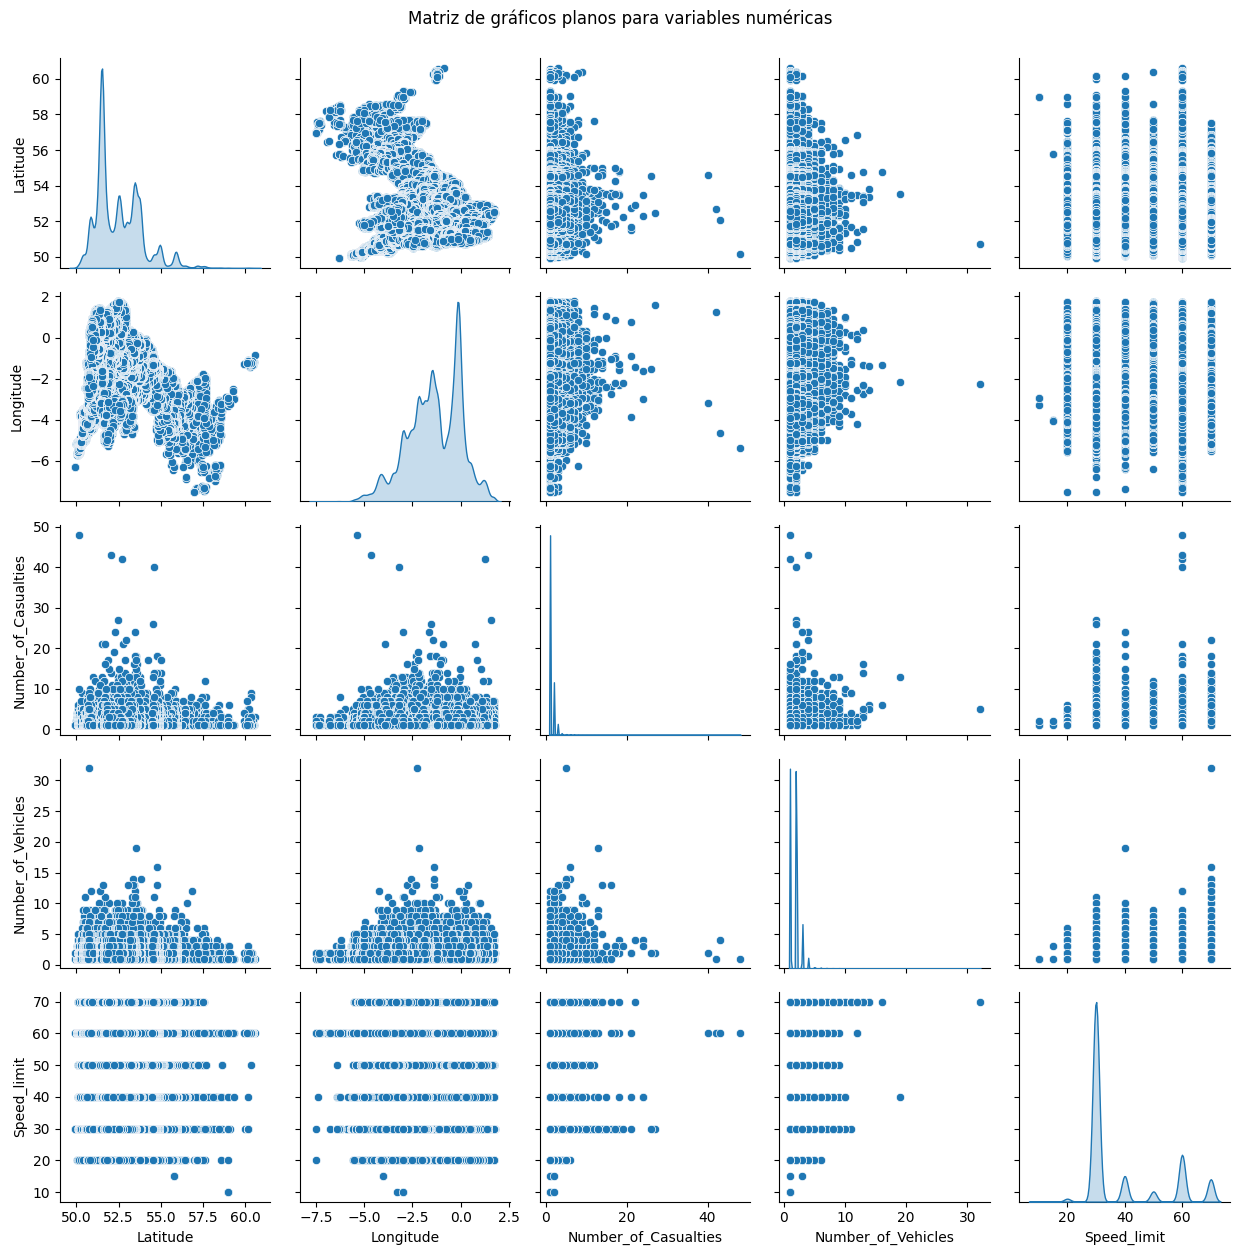

In [16]:
# Matriz de gráficos planos
sns.pairplot(accidents[numerical_variables], diag_kind = "kde")

plt.suptitle("Matriz de gráficos planos para variables numéricas", y = 1)
plt.tight_layout()
plt.show()

A la vista de este gráfico, no parece haber ningún problema de errores en los datos. Algunas otras conclusiones que podemos sacar es que en el gráfico de latitud vs longitud podemos ver a la perfección la silueta de Gran Bretaña (sin irlanda del norte). También se puede apreciar que la mayoría de los datos se concentran geográficamente en el centro del país, más en específico en el entorno de Londres, que presenta un pico en la frecuencia. Las dos variables que posiblemente puedan dar más problemas con los atípicos serán las de número de víctimas y número de vehículos, dado que son muy asimétricas a la derecha. No obstante, no parece que contengan errores.

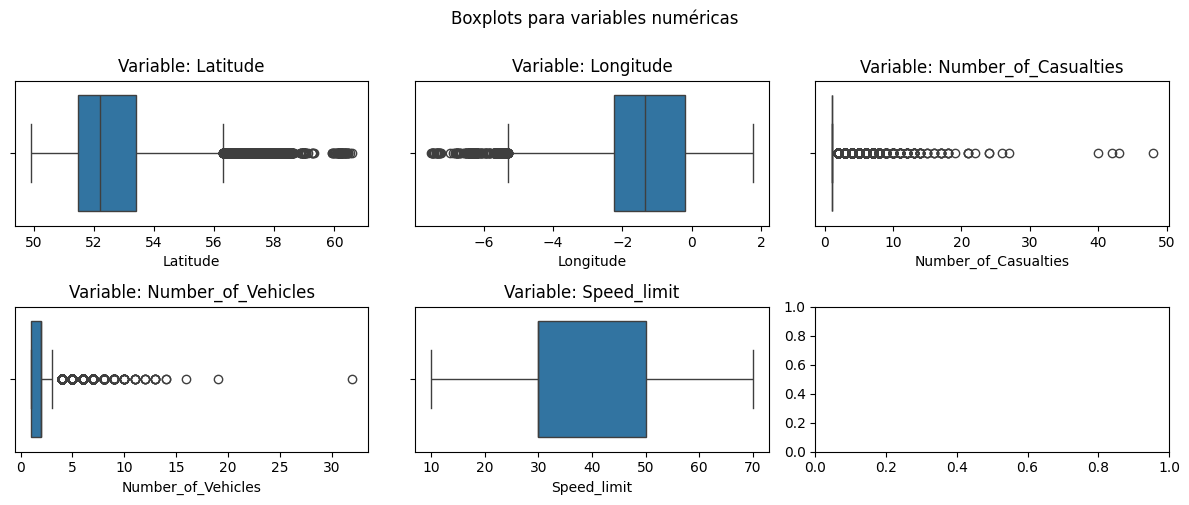

In [17]:
# Boxplots para variables numéricas

n = len(numerical_variables)
fig, axes = plt.subplots(nrows = (n + 2) // 3, ncols = 3, figsize = (12, n))

for i, var in enumerate(numerical_variables):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x = accidents[var], ax = ax)
    ax.set_title(f"Variable: {var}")

plt.suptitle("Boxplots para variables numéricas", y = 1)
plt.tight_layout()
plt.show()

A partir de estos gráficos podemos confirmar las conclusiones del gráfico anterior, viendo como la mayoría de los datos se concentran en términos geográficos en el centro del país, siendo las latitudes muy al norte y las longitudes muy hacia el oeste poco frecuentes. Las variables de número de víctimas y número de vehículos son muy asimétricas mientras que la variable de límite de velocidad está razonablemente bien distribuida, ya que su rango de valores es limitado.

## 2.4. Transformaciones

La transformación y creación de variables nuevas tiene el objetivo de facilitar su uso posterior en análisis o visualizaciones, así como mejorar su interpretabilidad. Con este objetivo, transformaremos las dos variables asimétricas con un logaritmo, lo cual reducirá su asimetría y facilitará la visualización de los datos. Además, crearemos una nueva variable de marca de tiempo ``timestamp`` con el tipo de dato pd.Timestamp

In [ ]:
# Transformaciones logaritmicas

# Ambas variables son estrictamente mayores que 0, por lo que no es
#   necesario sumarles ninguna cantidad extra para que no causen problemas
accidents["Log_Number_of_Vehicles"] = np.log(accidents["Number_of_Vehicles"]) 
accidents["Log_Number_of_Casualties"] = np.log(accidents["Number_of_Casualties"])

# Añadimos las nuevas variables a la lista de variables numéricas
numerical_variables.append("Log_Number_of_Vehicles")
numerical_variables.append("Log_Number_of_Casualties")

Para intentar ver si esta transformación va a resultar útil, vamos a visualizar estas dos nuevas variables con dos tipos de gráficos: histogramas y gráficos cuantil-cuantil poisson. La elección de este segundo tipo de gráfico se motiva a continuación.

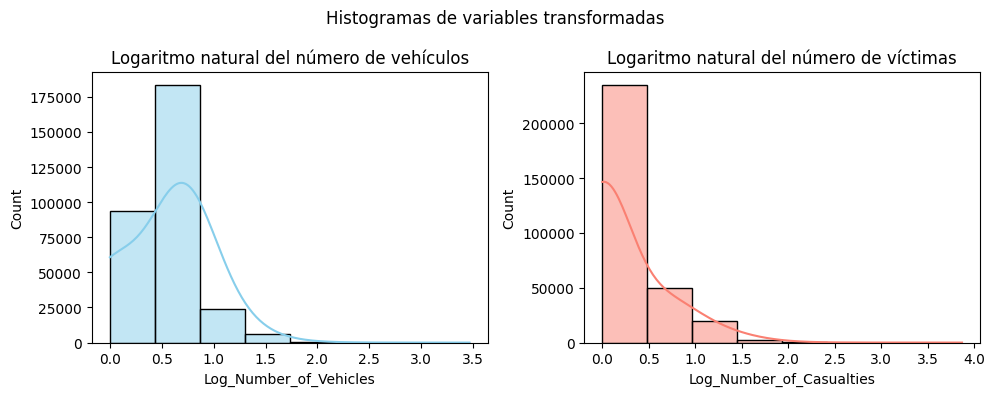

In [19]:
# Representación de las nuevas variables con histogramas
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

histogram_common_params = { "data": accidents, "bins": 8, "kde": True, "kde_kws": {"bw_adjust": 10} }
sns.histplot(x = "Log_Number_of_Vehicles", ax = axes[0], color = "skyblue", **histogram_common_params)
sns.histplot(x = "Log_Number_of_Casualties", ax = axes[1], color = "salmon", **histogram_common_params)

axes[0].set_title("Logaritmo natural del número de vehículos")
axes[1].set_title("Logaritmo natural del número de víctimas")
plt.suptitle("Histogramas de variables transformadas")
plt.tight_layout()
plt.show()

La transformación parece haber ayudado, especialmente para el número de vehículos. En el caso del número de víctimas, no da la sensación de que esta variable vaya a resultar muy útil, ya que sigue siendo muy asimétrica. 
Para intentar visualizar lo diferentes que son estas variables de una distribución poisson, y observar si el peso que tienen las colas en la distribución es excesivo, usaremos unos diagramas Q-Q. La elección de la distribución poisson es común para variables que expresan recuentos, como es el caso para ambas.

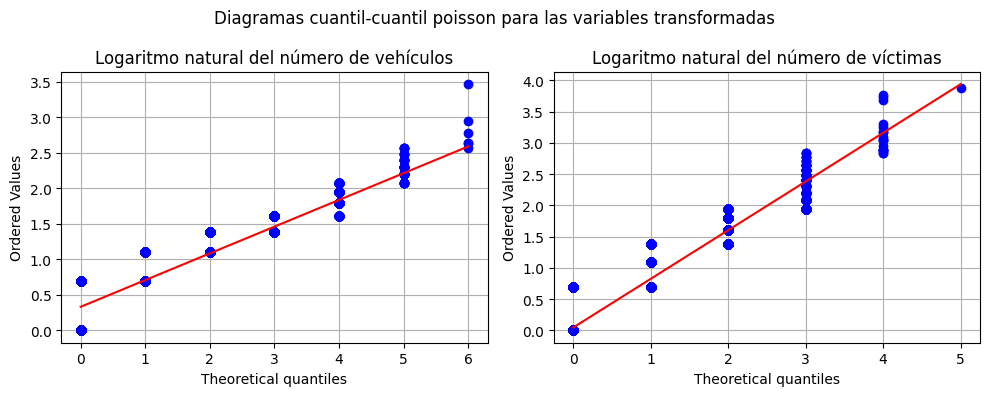

In [20]:
# Representación de la distribución de los cuantiles de las nuevas variables vs si fueran una distribución poisson
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Calculamos los promedios de cada distribución
mu_log_NoV, mu_log_NoC = accidents["Log_Number_of_Vehicles"].mean(), accidents["Log_Number_of_Casualties"].mean()
stats.probplot(accidents["Log_Number_of_Vehicles"], dist = "poisson", plot = axes[0], sparams = (mu_log_NoV,))
stats.probplot(accidents["Log_Number_of_Casualties"], dist = "poisson", plot = axes[1], sparams = (mu_log_NoC,))

axes[0].set_title("Logaritmo natural del número de vehículos"); axes[0].grid(True)
axes[1].set_title("Logaritmo natural del número de víctimas"); axes[1].grid(True)
plt.suptitle("Diagramas cuantil-cuantil poisson para las variables transformadas")
plt.tight_layout()
plt.show()

En estos gráficos, la línea roja representa los cuantiles teóricos de una distribución poisson, mientras que los puntos azules los observados. A partir de estos gráficos podemos concluir que los cuantiles de ambas variables se ajustan razonablemente bien a una distribución poisson. Esto no habría sucedido de no haber aplicado la transformación.

Para terminar esta sección, creamos una nueva variable de marca de tiempo.

In [21]:
# Crear nueva variable de marca de tiempo
accidents["timestamp"] = pd.to_datetime(accidents["Accident Date"] + ' ' + accidents["Time"], format = "%d-%m-%Y %H:%M")

# Rango temporal de los accidentes del dataset
print(f"Rango temporal:{accidents['timestamp'].min(): %B %d, %Y %H:%M} <-->" + \
      f"{accidents['timestamp'].max(): %B %d, %Y %H:%M}")

Rango temporal: January 01, 2021 00:01 <--> December 31, 2022 23:30


# 3. Análisis exploratorio

En esta sección nuestro objetivo es explorar en mayor medida el conjunto de datos, aunque en la sección anterior ya hemos tenido la oportunidad de observar todas las distribuciones unidimensionales de las variables mediante gráficos de barras e histogramas. Por tanto, en esta sección intentaremos cruzar algunas de las variables, lo que podrá darnos más información acerca de los tipos de datos que tenemos. En concreto, cubriremos los siguientes análisis:

1. Correlaciones lineales

2. Gravedad de los accidentes
    - Según tipos de peligros en la carretera
    - Tipo de vehículo
    - Condiciones meteorológicas
    - Urbano o rural

3. Análisis temporal 
    - Serie temporal de la evolución del número de accidentes
    - Número de accidentes por día de la semana (gráfico líneas)
    - Número de accidentes por mes natural (gráfico líneas)
    - Número de accidentes por día del mes (gráfico líneas)
    - Número de accidentes por hora del día (gráfico líneas)

4. Análisis geográfico 
    - Número de accidentes por distrito
    - Número de accidentes por $km^2$ por distrito
    - Número de accidentes per cápita por distrito


## 3.1. Correlaciones lineales

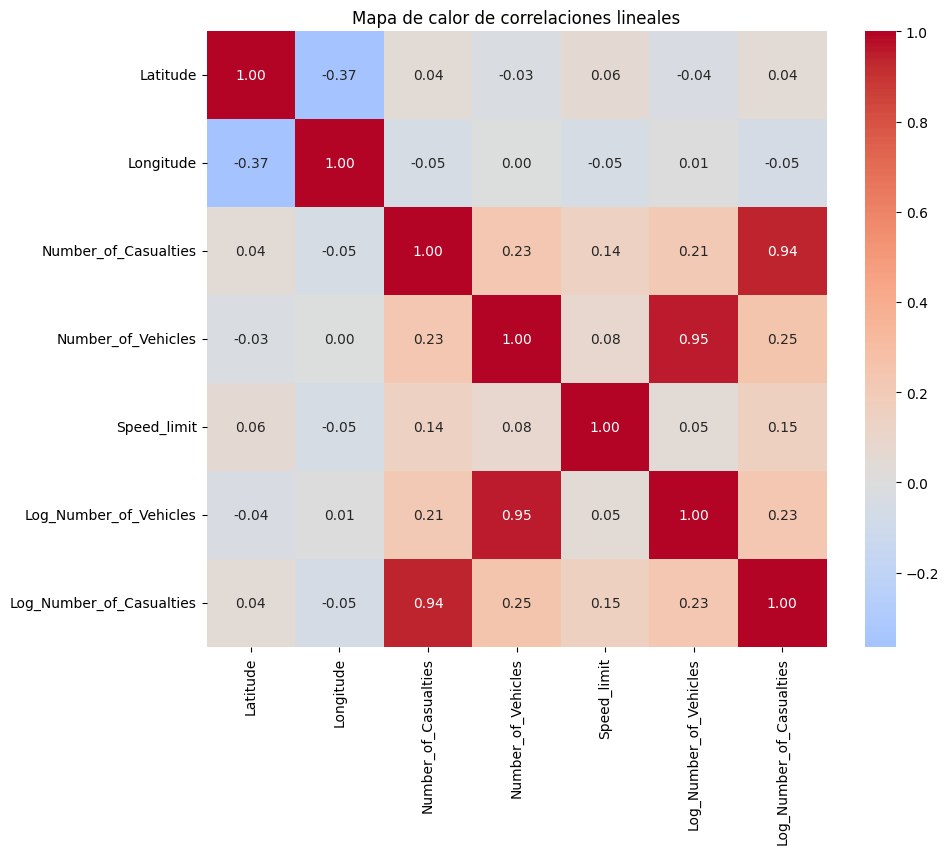

In [22]:
# Correlaciones lineales entre todas las variables
plt.figure(figsize = (10, 8))
sns.heatmap(accidents[numerical_variables].corr(), annot = True, fmt = ".2f", cmap = "coolwarm", center = 0)
plt.title("Mapa de calor de correlaciones lineales")
plt.show()

A parte de las correlaciones obvias como de las del número de vehículos y número de víctimas con sus transformadas, no encontramos correlaciones lineales muy significativas. A excepción de una correlación de -0.37 de la latitud con la longitud, lo cual no es muy informativo, la mayor correlación en términos absolutos es 0.25, que corresponde a la correlación entre el número de vehículos y el logaritmo del número de víctimas.


## 3.2. Gravedad de los accidentes

En esta subsección intentaremos visualizar la gravedad de los accidentes según las siguientes variables:

- Según tipos de peligros en la carretera
- Tipo de vehículo
- Condiciones meteorológicas
- Urbano o rural

Antes de empezar, creamos algunos objetos comunes para todos los análisis.

In [23]:
# Objetos comunes para analizar la gravedad de los accidentes

severity_values = accidents["Accident_Severity"].unique()

# Diccionario que pasarle a la función pd.DataFrameGroupBy.agg()
severity_agg_dict = {
    "Accident_Severity": [
        lambda x, sv = severity_value: sum(x == sv)
        for severity_value in severity_values
    ]
}
# Nuevo índice para el resultado de la agregación (eliminar <lambda 1>, <lambda 2>, etc)
severity_agg_columns = pd.MultiIndex.from_tuples([
    ("Accident_Severity", severity_value)
    for severity_value in severity_values
])

Riesgo de los accidentes por el tipo de peligro en la carretera (tabla de contingencia).

In [24]:
accidents_by_road_hazard = accidents.groupby(["Carriageway_Hazards"]).agg(severity_agg_dict)
accidents_by_road_hazard.columns = severity_agg_columns

accidents_by_road_hazard = accidents_by_road_hazard.sort_values(by = ("Accident_Severity", "Slight"), ascending = False)
display(accidents_by_road_hazard)

Accident_Severity          \
                                                          Serious  Slight   
Carriageway_Hazards                                                         
unknown                                                     39959  258711   
Other object on road                                          342    1863   
Any animal in carriageway (except ridden horse)               235    1377   
Pedestrian in carriageway - not injured                        86     624   
Previous accident                                              82     410   
Vehicle load on road                                           36     295   

                                                       
                                                Fatal  
Carriageway_Hazards                                    
unknown                                          3879  
Other object on road                               38  
Any animal in carriageway (except ridden horse)     8  
Pedestrian in carriageway - not injured             5  
Previous accident                                  19  
Vehicle load on road                                4

Ahora representamos la tabla obtenida en un diagrama de barras. Como es preferible observar la distribución de cada tipo de accidente dado el peligro en la carretera, normalizamos la tabla por columnas. Como vamos a repetir este proceso en los siguientes, definiremos una función. 

In [25]:
def two_way_contingency_table_barplot(table: pd.DataFrame, title: str) -> None:
    """
    Representa en un diagrama de barras 3 distribuciones según el tipo de 
    gravedad del accidente. La variable dependiente es el índice de la tabla.
    """    
    dependent_variable = table.index.name

    # Aplanar multi-índice y convertir a float (para normalizar)
    table.columns = [ var[1] for var in table.columns ]
    table = table.astype(float).reset_index()
    
    # Normalizar columnas
    table.iloc[:, 1:] = table.iloc[:, 1:].div(table.iloc[:, 1:].sum(axis = 0), axis = 1)

    # Convertir a formato largo (para sns)
    table_long = table.melt(
        id_vars = dependent_variable,  
        var_name = "Accident_Severity", 
        value_name = "relative_frequency"
    )

    # Gráfico
    plt.figure(figsize = (8, 4))
    sns.barplot(data = table_long, x = "relative_frequency", y = dependent_variable, hue = "Accident_Severity")

    plt.title(f"Distribución del tipo de accidentes {title}")
    plt.xlabel("Frecuencia relativa del tipo de accidente")
    plt.ylabel(dependent_variable)
    plt.show()

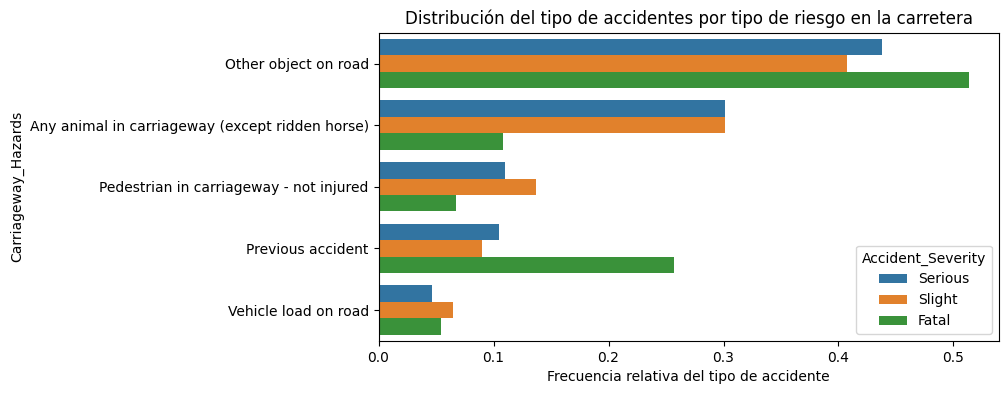

In [26]:
two_way_contingency_table_barplot(
    table = accidents_by_road_hazard[accidents_by_road_hazard.index != "unknown"],
    title = "por tipo de riesgo en la carretera"
)

En este gráfico podemos ver que los accidentes mortales ocurren con más probabilidad si ha habido un accidente anteriormente, en comparación con accidentes leves o serios. Esto no quiere decir que la probabilidad de que ocurra un accidente mortal sea mayor si hay un accidente anterior, sino que sabiendo que ha habido un accidente mortal, la probabilidad de que hubiera habido un accidente anteriormente es mayor a que si el accidente fuera leve o serio. Lo mismo se puede decir pero al contrario de haber animales en la calzada.


Riesgo de los accidentes por el tipo de vehículo (tabla de contingencia).

In [27]:
accidents_by_vehicle_type = accidents.groupby(["Vehicle_Type"]).agg(severity_agg_dict)
accidents_by_vehicle_type.columns = severity_agg_columns

accidents_by_vehicle_type = accidents_by_vehicle_type.sort_values(by = ("Accident_Severity", "Slight"), ascending = False)
display(accidents_by_vehicle_type)

Accident_Severity              
                                                Serious  Slight Fatal
Vehicle_Type                                                         
Car                                               31583  205079  3132
Van / Goods 3.5 tonnes mgw or under                2121   13364   210
Motorcycle over 500cc                              1496    9587   143
Bus or coach (17 or more pass seats)               1135    7465    86
Motorcycle 125cc and under                          926    5845    81
Goods 7.5 tonnes mgw and over                       878    5587    67
Taxi/Private hire car                               742    4742    59
Motorcycle 50cc and under                           501    3159    43
Motorcycle over 125cc and up to 500cc               414    2822    49
Other vehicle                                       355    2127    34
Goods over 3.5t. and under 7.5t                     352    2119    31
Minibus (8 - 16 passenger seats)                    118     693    10
Agricultural vehicle                                105     636     8
Pedal cycle                                          14      52     0
Ridden horse                                          0       3     0

Representamos la tabla con un diagrama de barras, aunque como "Car" tiene mucho peso, que corresponde a los turismos corrientes, también repetimos el gráfico eliminándolo.

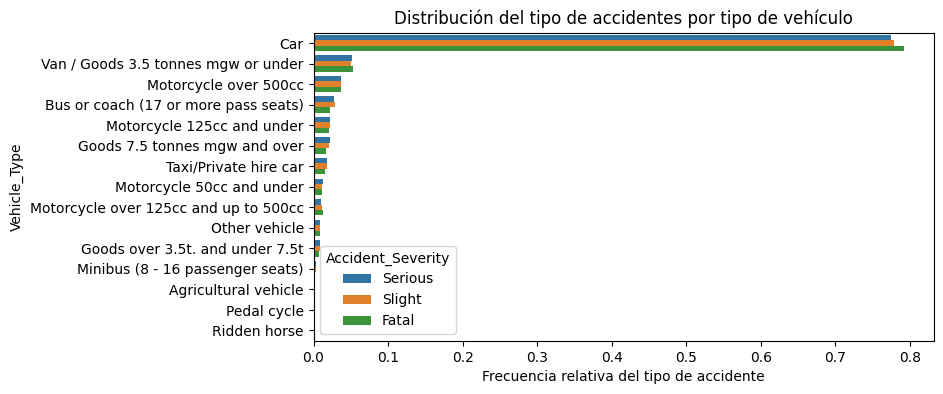

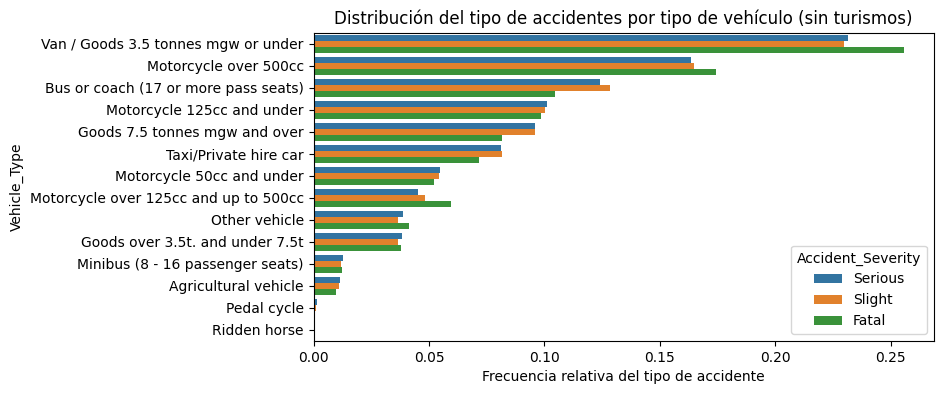

In [28]:
two_way_contingency_table_barplot(
    table = accidents_by_vehicle_type.copy(),
    title = "por tipo de vehículo"
)
two_way_contingency_table_barplot(
    table = accidents_by_vehicle_type[accidents_by_vehicle_type.index != "Car"],
    title = "por tipo de vehículo (sin turismos)"
)

A la vista de estos gráficos, da la sensación de que las distribuciones son iguales, o en su defecto muy similares. Esto podría indicar independencia entre el tipo de vehículo y la gravedad de los accidentes. Desde un punto de vista estadístico riguroso, estas diferencias probablemente sean estadísticamente significativas debido al tamaño muestral alto, por ejemplo, usando una prueba $\chi^2$. Sin embargo, si que podríamos afirmar que el conocimiento de una de las variables no proporcionará mucha información sobre la otra, aunque sí en el margen.

Por ejemplo, los autobuses parecen estar más relacionados con accidentes leves y serios que con mortales, y las furgonetas de menos de 3.5 toneladas parecen estar más relacionadas con accidentes mortales que con leves y serios.


Riesgo de los accidentes según las condiciones meteorológicas (tabla de contingencia).

In [29]:
accidents_by_weather = accidents.groupby(["Weather_Conditions"]).agg(severity_agg_dict)
accidents_by_weather.columns = severity_agg_columns

accidents_by_weather = accidents_by_weather.sort_values(by = ("Accident_Severity", "Slight"), ascending = False)
display(accidents_by_weather)

Accident_Severity              
                                Serious  Slight Fatal
Weather_Conditions                                   
Fine no high winds                33654  207574  3268
Raining no high winds              4363   33074   404
Other                               904    7814    84
Snowing no high winds               418    4390    31
Fog or mist                         469    4255    59
Raining + high winds                440    3036    50
Fine + high winds                   431    2661    56
Snowing + high winds                 61     476     1

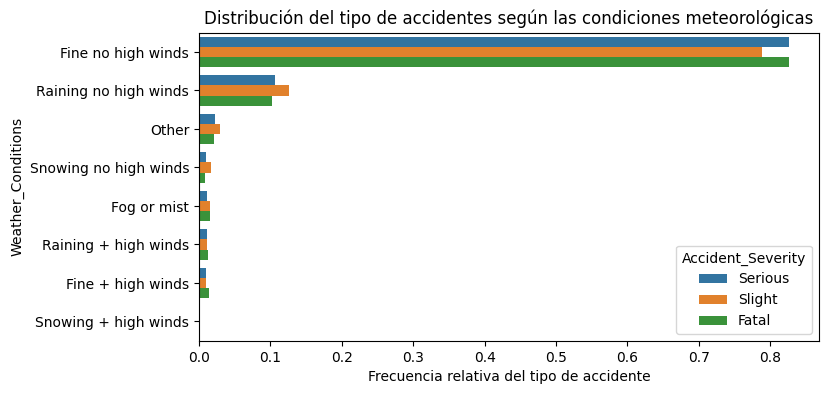

In [30]:
two_way_contingency_table_barplot(
    table = accidents_by_weather,
    title = "según las condiciones meteorológicas"
)

En este caso, las distribuciones son también muy parecidas y no hay grandes diferencias entre ellas.

Riesgo de los accidentes por el lugar del accidente (urbano/rural) (tabla de contingencia).

In [31]:
accidents_by_urban_or_rural_area = accidents.groupby(["Urban_or_Rural_Area"]).agg(severity_agg_dict)
accidents_by_urban_or_rural_area.columns = severity_agg_columns

accidents_by_urban_or_rural_area = accidents_by_urban_or_rural_area.sort_values(by = ("Accident_Severity", "Slight"), ascending = False)
display(accidents_by_urban_or_rural_area)

Accident_Severity              
                              Serious  Slight Fatal
Urban_or_Rural_Area                                
Urban                           23512  173416  1604
Rural                           17228   89864  2349

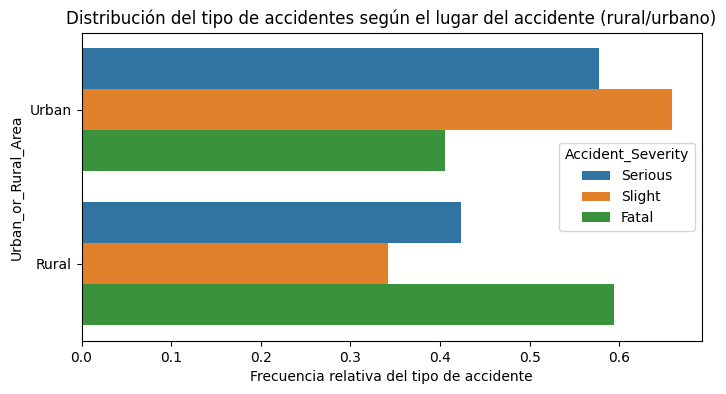

In [32]:
two_way_contingency_table_barplot(
    table = accidents_by_urban_or_rural_area,
    title = "según el lugar del accidente (rural/urbano)"
)

En este gráfico podemos apreciar que en las ciudades se concentran los accidentes más leves, mientras que sucede a la inversa para los ámbitos rurales. Esto tiene sentido ya que en las ciudades la velocidad es en promedio mucho menor que en vías interurbanas, algo que intuitivamente podemos relacionar con accidentes más leves.

## 3.3. Análisis temporal

En esta subsección representaremos los datos de accidentes con respecto a varias variables temporales. En concreto, realizaremos los siguientes gráficos:

- Serie temporal de la evolución del número de accidentes
- Número de accidentes por día de la semana (gráfico líneas)
- Número de accidentes por mes natural (gráfico líneas)
- Número de accidentes por día del mes (gráfico líneas)
- Número de accidentes por hora del día (gráfico líneas)

Empezamos con la serie temporal.

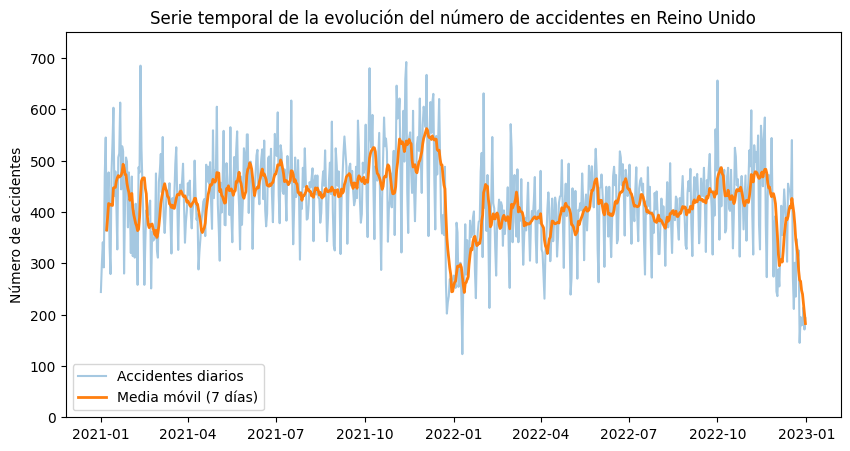

In [33]:
# Serie temporal de accidentes por día
accidents_per_day = pd.to_datetime(accidents["Accident Date"], format = "%d-%m-%Y").value_counts().sort_index()

# Media móvil de 7 días
accidents_per_day_7d_ma = accidents_per_day.rolling(window = 7).mean()

plt.figure(figsize = (10, 5))
sns.lineplot(x = accidents_per_day.index, y = accidents_per_day, label = "Accidentes diarios", alpha = 0.4)
sns.lineplot(x = accidents_per_day_7d_ma.index, y = accidents_per_day_7d_ma, label = "Media móvil (7 días)", linewidth = 2)
plt.title("Serie temporal de la evolución del número de accidentes en Reino Unido")
plt.xlabel("")
plt.ylabel("Número de accidentes")
plt.ylim([0, 750])
plt.show()

En este gráfico podemos apreciar la tendencia en el número de accidentes en Reino Unido durante los años 2021 y 2022. Podemos ver, por ejemplo, que el número de accidentes en 2021 fue algo mayor en promedio que en 2022, y que presenta una tendencia creciente a lo largo del año natural. También llama la atención que durante las navidades el número de accidentes disminuye significativamente.

Gráfico de líneas de número de accidentes vs día de la semana.

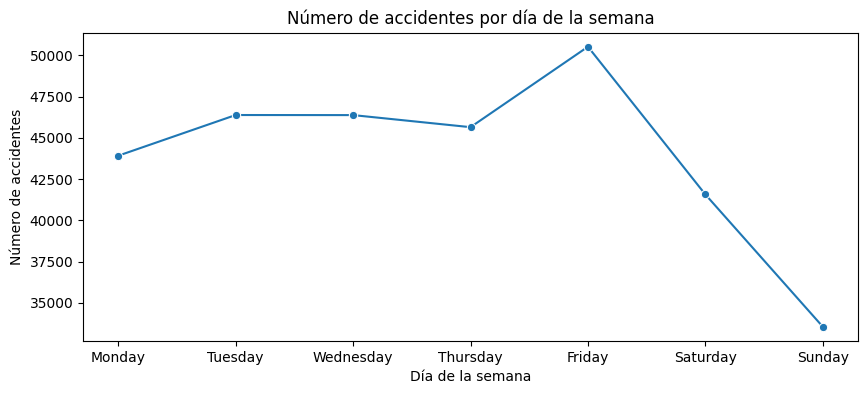

In [34]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Recuento de número de accidentes para cada día de la semana
accidents_by_weekday = accidents["Day_of_Week"].value_counts()

plt.figure(figsize = (10, 4))
sns.lineplot(data = accidents_by_weekday[weekdays], marker = "o")
plt.title("Número de accidentes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de accidentes")
plt.show()

En este gráfico podemos ver como en los fines de semana ocurren menos accidentes que en los días de diario, y que los viernes es el día con más accidentes.


Gráfico de líneas número de accidentes vs mes natural.

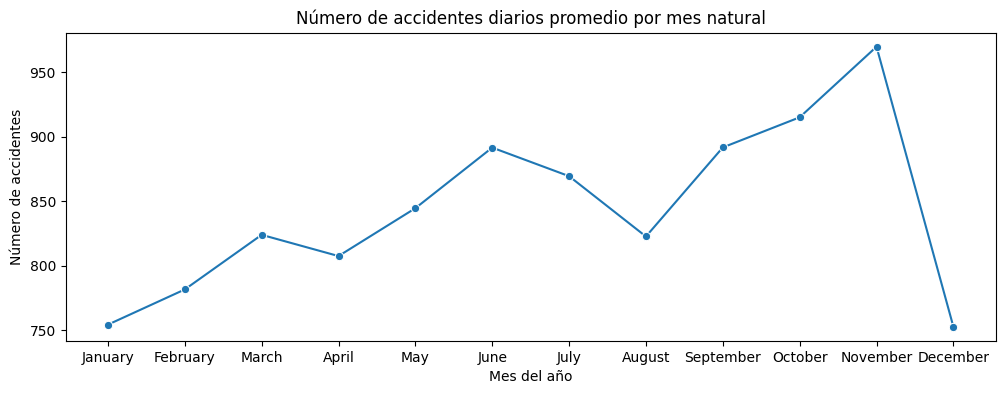

In [35]:
months = { # Meses y número de días por mes
    "January": 31, "February": 28, "March": 31, "April": 30, "May": 31, "June": 30,
    "July": 31, "August": 31, "September": 30, "October": 31, "November": 30, "December": 31
}

# Recuento de número de accidentes para cada mes natural
accidents_by_month = accidents["timestamp"].dt.month_name().value_counts()

# Promedio de accidentes por día
mean_accidents_by_month = accidents_by_month[list(months.keys())] / np.array(list(months.values()))

plt.figure(figsize = (12, 4))
sns.lineplot(data = mean_accidents_by_month, marker = "o")
plt.title("Número de accidentes diarios promedio por mes natural")
plt.xlabel("Mes del año")
plt.ylabel("Número de accidentes")
plt.show()

En este gráfico podemos confirmar la sospecha que apreciamos en la serie temporal sobre que los accidentes tienden a aumentar a medida que avanza el año (excepto navidades).


Gráfico de líneas número de accidentes vs día del mes.

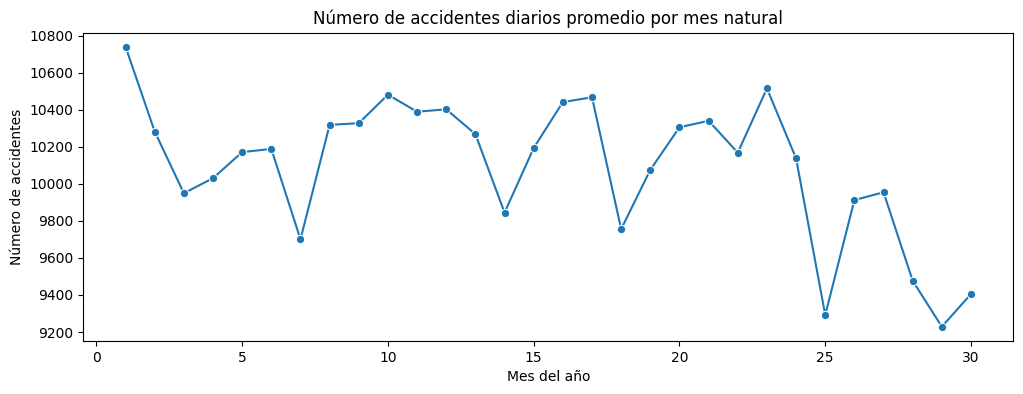

In [36]:
# Recuento de número de accidentes para cada día del mes
accidents_by_month = accidents["timestamp"].dt.day.value_counts().sort_index()

# No tenemos en cuenta el día 31 para el gráfico
plt.figure(figsize = (12, 4))
sns.lineplot(data = accidents_by_month[:-1], marker = "o")
plt.title("Número de accidentes diarios promedio por mes natural")
plt.xlabel("Mes del año")
plt.ylabel("Número de accidentes")
plt.show()

A la vista de este gráfico, no parece que haya ninguna relación del número de accidentes con el día de la semana, excepto una cierta concentración en el primer día de cada mes.


Gráfico de líneas número de accidentes vs hora del día.

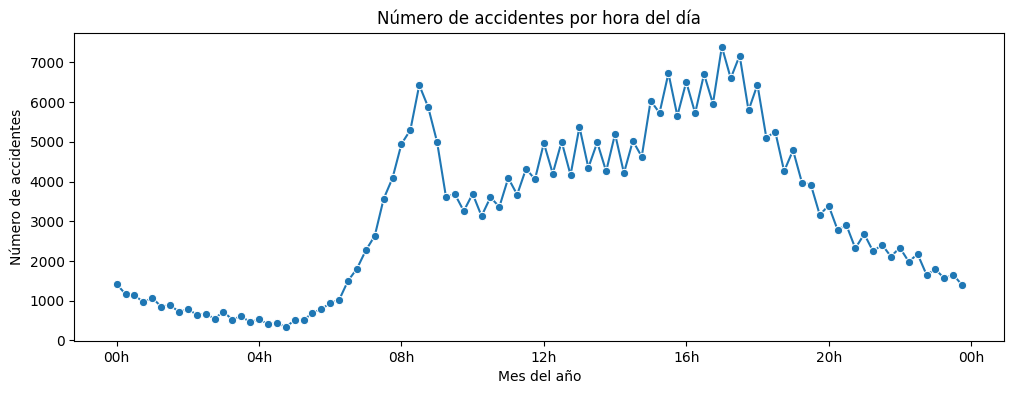

In [37]:
import matplotlib.dates as mdates

# Recuento de número de accidentes para cada hora del día
accidents_by_hour = accidents["timestamp"].dt.floor("15min").dt.strftime("%H:%M").value_counts().sort_index()

# Para el gráfico queremos que el índice sea un pd.datetime válido
accidents_by_hour = pd.Series(accidents_by_hour.values, index = pd.to_datetime(accidents_by_hour.index, format = "%H:%M"))


plt.figure(figsize = (12, 4))
sns.lineplot(data = accidents_by_hour, marker = "o")

# Cambiamos las etiquetas del eje para mostrar solo una cada 4 horas
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Hh"))

plt.title("Número de accidentes por hora del día")
plt.xlabel("Mes del año")
plt.ylabel("Número de accidentes")
plt.show()

En este gráfico podemos apreciar un patrón claro de los accidentes con la hora del día. Los accidentes se concentran durante las horas de luz, con picos alrededor de las 8h y las 17h. Además, durante la madrugada ocurren muy pocos accidentes.

## 3.4. Análisis geográfico

En esta subsección nuestro objetivo es representar los datos con respecto a una variable geográfica: el distrito donde ocurre el accidente. En concreto, analizaremos lo siguiente:

- Número de accidentes por distrito
- Número de accidentes por $km^2$ por distrito
- Número de accidentes per cápita por distrito

Como en nuestro dataframe tenemos más de 400 distritos, no es factible utilizar ni un diagrama de barras ni una tabla, sobre todo si tenemos en cuenta que no conocemos casi ninguno de los nombres de los distritos de Reino Unido o su ubicación. Por tanto, la opción más razonable es representarlo con un mapa.

Para dibujar este mapa, hemos descargado un archivo shapefile de la página web de la oficina nacional de estadística del gobierno de Reino unido: [Enlace para descargar el shapefile](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2024-boundaries-uk-bfe-2/about), que es el primer resultado al buscar en google "uk districts shapefile". Este archivo se proporciona adjunto al presente cuaderno. Para manejarlo y pintar el mapa usaremos la librería ``geopandas``.

In [38]:
# Leemos el archivo shapefile de los distritos de Reino Unido
shapefile_path = "Local_Authority_Districts_May_2024_Boundaries_UK_BFE_-5758551109064458912.zip"
uk_geodf = geopandas.read_file(shapefile_path)

print(uk_geodf.shape)
display(uk_geodf.sample(5))

(361, 8)


,LAD24CD,LAD24NM,LAD24NMW,BNG_E,BNG_N,LONG,LAT,geometry
24,E06000025,South Gloucestershire,None,367556,183197,-2.469260,51.5467,"POLYGON ((364881.76 196491.04, 364889.74 19648..."
92,E07000069,Castle Point,None,579493,187920,0.588127,51.5616,"POLYGON ((578209.402 190740.101, 578235.102 19..."
119,E07000096,Dacorum,None,500084,208745,-0.550980,51.7685,"POLYGON ((505599.7 218260.803, 505619.2 218228..."
185,E07000196,South Staffordshire,None,389624,311036,-2.154960,52.6969,"POLYGON ((393698.003 320857.305, 393677.102 32..."
116,E07000093,Test Valley,None,434930,137329,-1.502140,51.1342,"POLYGON ((433819.33 160114.01, 433835.72 16007..."


Este 'GeoDataFrame' contiene la geometría de 361 distritos de Reino Unido, que son bastante menos que los 421 distritos que teníamos en nuestro dataframe de accidentes. Además, nuestro dataset no incluye datos de irlanda del norte, por lo que concluimos que tenemos bastantes distritos duplicados o erróneos.

Para intentar que esto no resulte un problema muy grave, viéndonos obligados a excluir muchos de los datos, hemos optado por emparejar los distritos utilizando como criterio la distancia mínima de Damerau-Levenshtein, en lugar de aplicar un merge directamente.

In [39]:
accidents_districts = accidents["Local_Authority_(District)"].unique()
map_districts = set(uk_geodf["LAD24NM"].unique())

# Mejor emparejamiento con distancia de edición
best_match = {
    district: edit_distance(district, map_districts).idxmin()
    for district in accidents_districts
}

# Accidentes por distrito (con distritos normales)
accidents_per_district = accidents["Local_Authority_(District)"].value_counts().reset_index()

# Reescribir los distritos por el mejor encontrado entre los del mapa
accidents_per_district["Local_Authority_(District)"] = accidents_per_district["Local_Authority_(District)"].replace(best_match)

# Recalcular la suma por distrito
accidents_per_district = accidents_per_district.groupby("Local_Authority_(District)").agg({ "count": "sum" })

Procedemos a unir los dataframes y dibujar el mapa, representando los valores faltantes en gris. Como en Londres hay muchos distritos y no se aprecian en el mapa, también hemos decidido añadir otro mapa ampliando esta región.

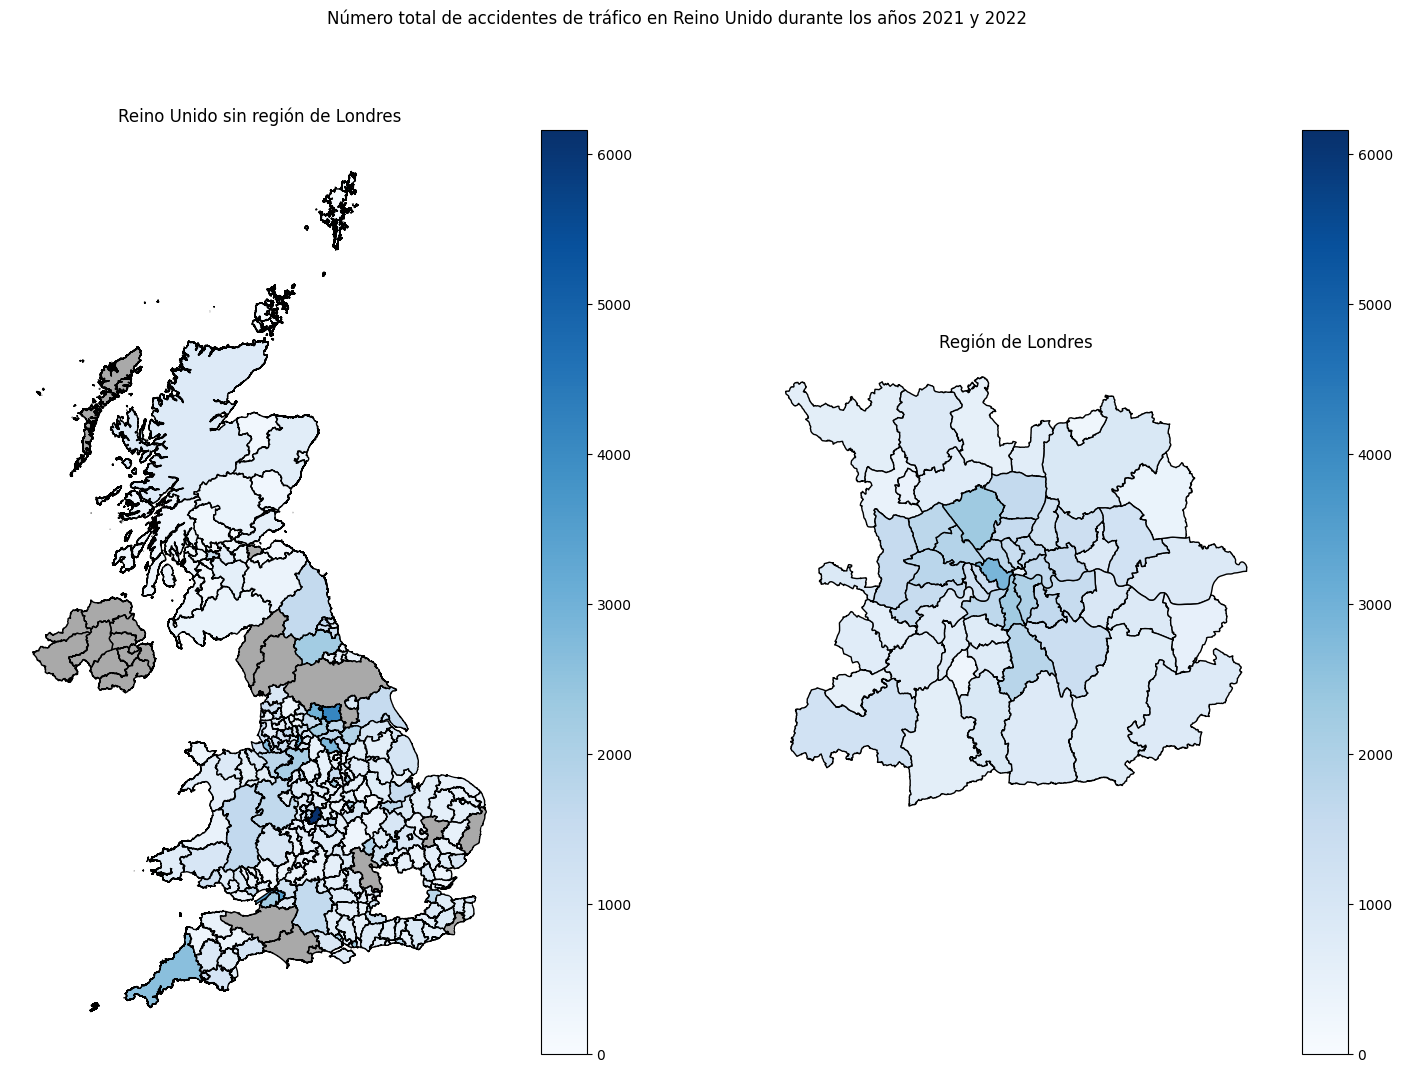

In [ ]:
def plot_map(gdf: geopandas.GeoDataFrame, plot_params: dict, title: str) -> None:
    """
    Dibuja un mapa de Reino Unido de acuerdo con los parámetros fijados en
    ``plot_params``, y las geometrías indicadas en ``gdf``. El parámetro
    ``title`` determina el plt.suptitle del gráfico.
    """
    # Dibujar el mapa (uno en general, otro ampliado para londres)
    fig, ax = plt.subplots(1, 2, figsize = (18, 12))

    long_min, long_max = -0.6, 0.4
    lat_min, lat_max = 51.2, 51.8
    london_filter = (gdf["LONG"] > long_min) & (gdf["LONG"] < long_max) & \
        (gdf["LAT"] > lat_min) & (gdf["LAT"] < lat_max)

    # Mapa de todo el país sin londres
    gdf[~london_filter].plot(ax = ax[0], **plot_params)
    ax[0].axis("off")
    ax[0].set_title("Reino Unido sin región de Londres")

    # Mapa ampliado en londres    
    gdf[london_filter].plot(ax = ax[1], **plot_params)
    ax[1].axis("off")
    ax[1].set_title("Región de Londres")

    plt.suptitle(title)
    plt.show()


# Unimos los dataframes
accidents_uk_geodf = uk_geodf.merge(accidents_per_district, how = "left", left_on = "LAD24NM", right_on = "Local_Authority_(District)")

# Parámetros para la función plot
plot_params = {
    "column": "count", "legend": True, "cmap": "Blues", "edgecolor": "black", 
    "vmin": 0, "vmax": accidents_uk_geodf["count"].max(),
    "missing_kwds": { "color": "darkgrey" } # Valores missing de gris
}
plot_map(accidents_uk_geodf, plot_params, title = "Número total de accidentes de tráfico en Reino Unido durante los años 2021 y 2022")

En estos dos mapas podemos apreciar algunos valores elevados, que se corresponden a núcleos urbanos, mientras que el resto del país presenta una cantidad mucho menor de accidentes. 

Para seguir obteniendo más información, ahora representaremos el número de accidentes por unidad de superficie, una variable que podemos obtener con el propio geodataframe.

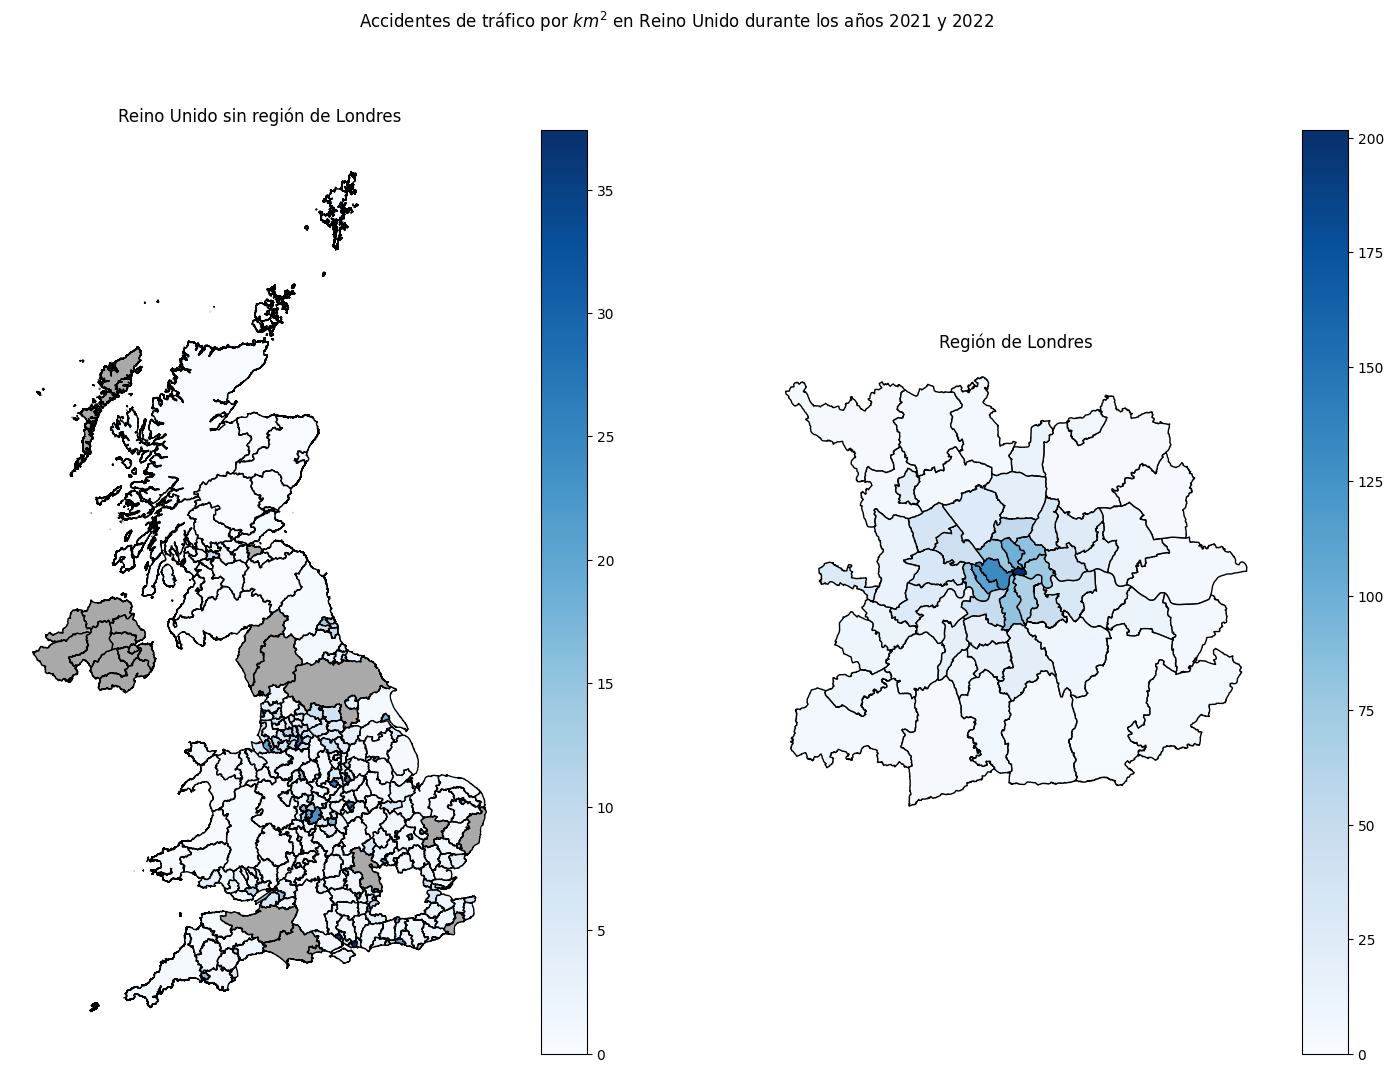

In [41]:
# Podemos obtener el área de cada distrito en m^2 con accidents_uk_geodf.geometry.area
accidents_uk_geodf["accidents_per_sq_km"] = accidents_uk_geodf["count"] / accidents_uk_geodf.geometry.area * 1e6
plot_params["column"] = "accidents_per_sq_km"
plot_params["vmax"] = None

plot_map(accidents_uk_geodf, plot_params, title = "Accidentes de tráfico por $km^2$ en Reino Unido durante los años 2021 y 2022")

Nótese que en estos gráficos las escalas son diferentes entre las dos regiones. En estos dos gráficos también podemos observar muy claramente las diferencias entre los núcleos urbanos y el campo, concentrándose en los primeros una mayor incidencia de accidentes.

Para terminar esta sección, haremos un último mapa representando el número de accidentes en cada región per cápita. Para poder elaborar este mapa necesitamos una fuente adicional que nos proporcione datos de población. Para ello hemos utilizado la página web 'citypopulation.de', que proporciona una tabla que podemos leer con la función pandas.read_html.

In [42]:
uk_population = pd.read_html("https://www.citypopulation.de/en/uk/admin/")[0]

print(uk_population.shape)
print(uk_population.columns)
display(uk_population.head(5))

(456, 9)
Index(['Name', 'Status', 'Population Estimate 1981-06-30',
       'Population Estimate 1991-06-30', 'Population Estimate 2001-06-30',
       'Population Estimate 2011-06-30', 'Population Estimate 2021-06-30',
       'Population Estimate 2023-06-30', 'Unnamed: 8'],
      dtype='object')


,Name,Status,Population Estimate 1981-06-30,Population Estimate 1991-06-30,Population Estimate 2001-06-30,Population Estimate 2011-06-30,Population Estimate 2021-06-30,Population Estimate 2023-06-30,Unnamed: 8
0,Bath and North East Somerset,Unitary Authority,161500,163100,169200,175538,192419,199818,→
1,Bath and North East Somerset,Unitary Authority,161500,163100,169200,175538,192419,199818,→
2,Bedford,Unitary Authority,133400,135400,148100,157840,185796,189891,→
3,Bedford,Unitary Authority,133400,135400,148100,157840,185796,189891,→
4,Blackburn with Darwen,Unitary Authority,142500,137400,138500,147657,154954,157503,→


En esta tabla tenemos datos de unidades administrativas más pequeñas y más grandes, hasta un total de 456, aunque hay muchos duplicados. El primer paso será limpiar este nuevo dataframe.

In [43]:
uk_population["Status"].value_counts()

Status
District                     186
Unitary Authority            126
Metropolitan Borough          36
Borough                       32
Council Area                  32
County                        21
Local Government District     11
Metropolitan County            6
Country                        3
Administrative Area            1
City                           1
United Kingdom                 1
Name: count, dtype: int64

Observando la tabla en la [web](https://www.citypopulation.de/en/uk/admin/), determinamos que unidades administrativas son redundantes y debemos eliminar, que son 'United Kingdom', 'Administrative Area', 'Country', 'Metropolitan County' y 'County'.

In [44]:
# Eliminar las unidades administrativas que contienen otras más pequeñas
administrative_divisions_to_delete = { "United Kingdom", "Administrative Area", "Country", "Metropolitan County", "County" }
uk_population = uk_population[~uk_population["Status"].isin(administrative_divisions_to_delete)]

# Eliminar duplicados
uk_population = uk_population.drop_duplicates().reset_index(drop = True)
print(uk_population.shape)

(362, 9)


Tras la limpieza, el número de distritos coincide con los que tenemos en el mapa. Para fusionar los datos con el geodataframe utilizaremos el mismo criterio que empleamos anteriormente, a saber, que el nombre de la unidad administrativa sea el más cercano en términos de la distancia Damerau-Levenshtein.

In [45]:
# Fusionar los datos de población con los distritos

population_districts = uk_population["Name"].unique()

# Mejor emparejamiento con distancia de edición
best_match = {
    district: edit_distance(district, map_districts).idxmin()
    for district in population_districts
}

# Reescribir los distritos por el mejor encontrado entre los del mapa
uk_population["Name"] = uk_population["Name"].replace(best_match)

# Fusionar el geodataframe con los datos de población
accidents_population_uk_geodf = accidents_uk_geodf.merge(uk_population[["Name", "Population Estimate 2023-06-30"]], how = "left", left_on = "LAD24NM", right_on = "Name")

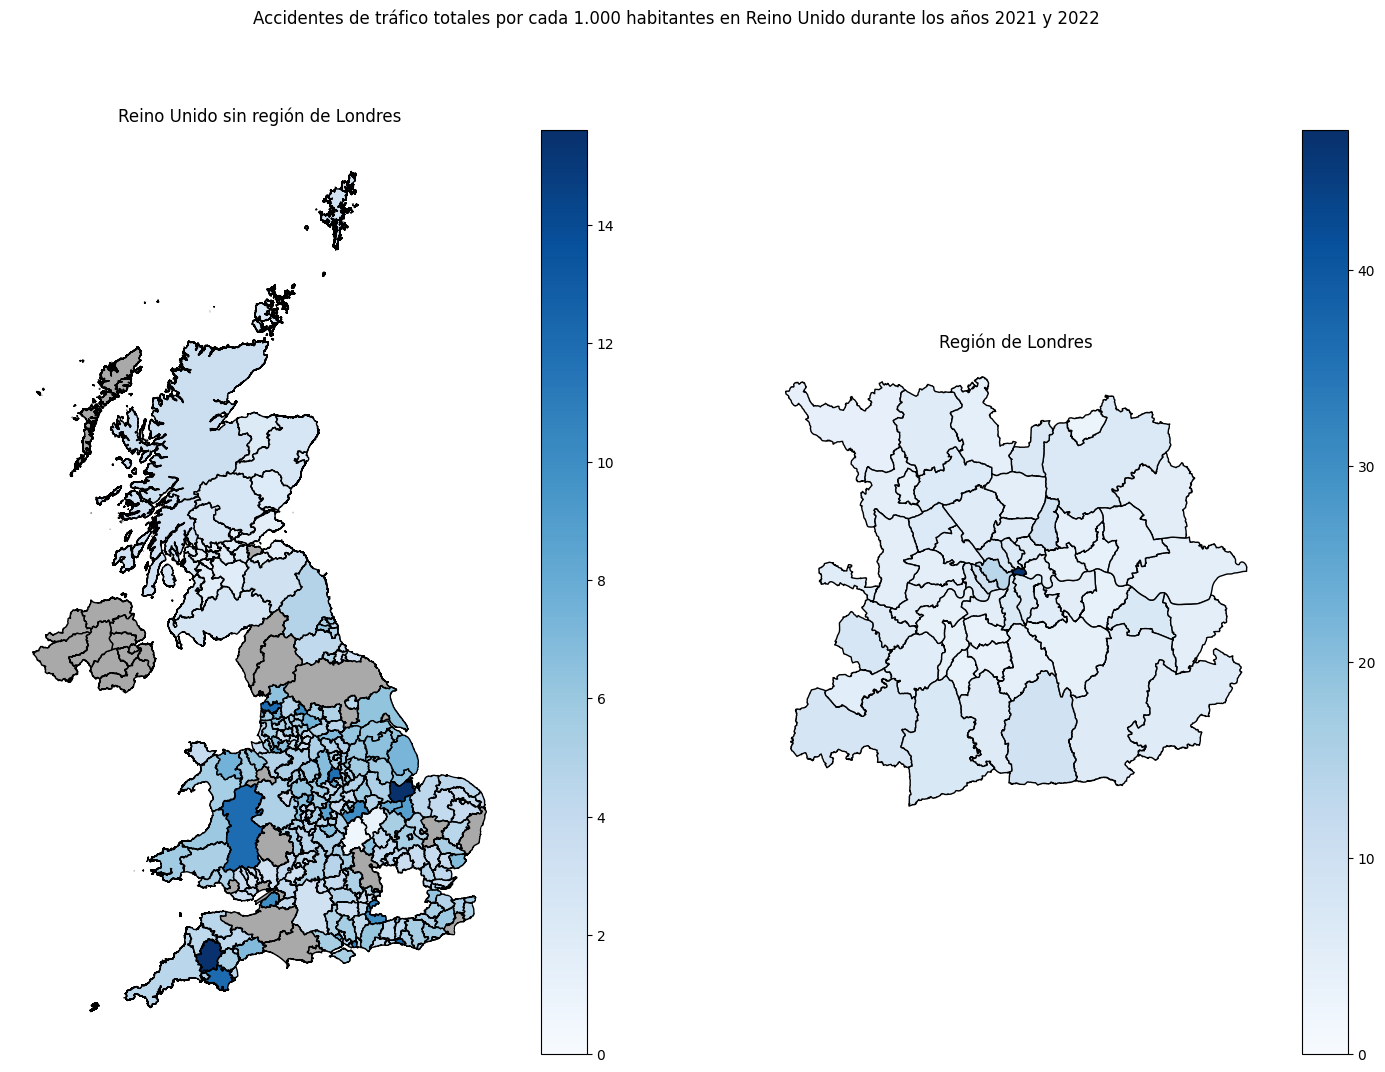

In [46]:
# Calculamos la tasa de accidentes por cada 1.000 habitantes
accidents_population_uk_geodf["accidents_per_1k_inhabitants"] = \
    accidents_population_uk_geodf["count"] / \
    accidents_population_uk_geodf["Population Estimate 2023-06-30"] * 1e3


# Mapa
plot_params["column"] = "accidents_per_1k_inhabitants"
plot_params["vmax"] = None

plot_map(accidents_population_uk_geodf, plot_params, title = "Accidentes de tráfico totales por cada 1.000 habitantes en Reino Unido durante los años 2021 y 2022")

Nótese que en ambos mapas las escalas son diferentes. En este gráfico podemos ver la distribución del número de accidentes per cápita en Reino Unido. Llama la atención que el lugar con más accidentes es la City de Londres, aunque esto probablemente se deba a que tiene muchos más visitantes diarios que población, lo que sesga al alza esta métrica. Los dos siguientes distritos con mayor tasa de accidentes de tráfico son South Holland y West Devon que son los que destacan con un color más intenso en el mapa de Reino Unido sin Londres.

In [47]:
# Mostrar los 10 distritos con mayor tasa de accidentes per cápita
display(
    accidents_population_uk_geodf[["Name", "accidents_per_1k_inhabitants"]]
    .sort_values("accidents_per_1k_inhabitants", ascending = False)
    .head(10)
)

,Name,accidents_per_1k_inhabitants
271,City of London,47.169811
164,South Holland,15.615585
87,West Devon,15.505327
304,Westminster,13.640146
42,Brighton and Hove,12.232270
84,South Hams,12.053896
368,Powys,12.012883
152,Wyre,11.906594
72,Amber Valley,11.737622
204,Surrey Heath,11.055898


# 4. Conclusiones

En esta actividad hemos realizado una gran variedad de análisis, explorando un dataset de accidentes de tráfico en Reino Unido. Además, hemos enriquecido este análisis incluyendo dos conjuntos de datos adicionales, uno con la geometría de los diferentes distritos del país, lo que nos ha permitido representar en un mapa varias estadísticas. El otro dataset que hemos utilizado contiene de datos de población en Reino Unido.

También hemos aplicado distintas técnicas de limpieza y normalización de datos, como la corrección de valores faltantes, errores sintácticos y semánticos en las variables, o transformaciones logarítmicas. Para facilitar la fusión de los diferentes datasets que hemos utilizado, también hemos aplicado un criterio de distancia mínima entre cadenas de texto, dado que algunas de las claves contenían errores o no coincidían de manera exacta.

En cuanto a las conclusiones extraídas de los datos:

1. Factores de riesgo de accidentes mortales en relación con leves y serios:
    - Accidentes previos 
    - Animal en la carretera (atenuante)
    - Furgonetas de menos de 3.5 toneladas
    - Autobuses (atenuante)
    - Zona interurbana

2. Relación con variables de tiempo
    - Menos accidentes en 2022 que en 2021
    - Menos accidentes en navidad
    - Menos accidentes los fines de semana
    - Tendencia creciente a lo largo del año (mínimo en enero, máximo en noviembre)
    - Concentración de accidentes entorno a las 8 y 17h
    - Pocos accidentes de madrugada

3. Relación geográfica
    - Concentración de accidentes en núcleos urbanos
    - Mayor tasa de accidentes per cápita en:
        - City de Londres
        - South Holland
        - West Devon	